# Table of contents
1. [Build Models To Compare Features: Raw Original Features](#raw-original-features)
2. [Build Models To Compare Features: Cleaned Original Features](#cleaned-original-features)
3. [Build Models To Compare Features: All Features](#all-features)
4. [Build Models To Compare Features: Reduced Set Of Features](#reduced-features)
5. [Build Models To Compare Features: Compare And Evaluate All Models](#compare-all-models)

## 1. Build Models To Compare Features: Raw Original Features <a name="raw-original-features"></a>

**Raw Original Features:** - Eight original features that they gave us right off the bat, without any cleaning other than converting the categorical features to numeric. 

### Read In Data

In [1]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('data/train_features_raw.csv')
train_labels = pd.read_csv('data/train_labels.csv',header=None)

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.412724,0.450064,0.573494
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.066661,0.450064,-0.718682
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.441904,0.450064,0.573494
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.425266,0.450064,0.573494
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.366273,0.450064,0.573494


In [2]:
train_labels.shape

(534, 1)

### GridSearchCV

With any model it's useful to test some different parameter settings. As some data or sets of features will require more complicated models than other sets of features. And remember, we do care about the complexity of our model. Less complex models is actually one of the benefits of feature engineering. So pass GridSearchCV a list of parameter settings, and it will run cross validation with each setting to help us decide on the best hyperparameters.

It is just a wrapper around cross validation that allows you to search for the best hyperparameter settings for your model.

In [3]:
# this function going to help us compare the results of each model
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

**Note:** The number of estimators(default value is 100), which is just the number of individual trees and the max depth(default values is None) represents the depth of each tree in the forest. 

**Note:** The process of fitting is non-deterministic so I could rerun this cell and get different results. And, you'll likely have different results as well. Hopefully, by the end of this exercise, our takeaways will be similar, even if the numbers are slightly different. 

In [4]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()

parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

C:\Users\archi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST PARAMS: {'max_depth': 8, 'n_estimators': 256}

0.757 (+/-0.143) for {'max_depth': 2, 'n_estimators': 8}
0.79 (+/-0.097) for {'max_depth': 2, 'n_estimators': 16}
0.79 (+/-0.113) for {'max_depth': 2, 'n_estimators': 32}
0.8 (+/-0.106) for {'max_depth': 2, 'n_estimators': 64}
0.787 (+/-0.118) for {'max_depth': 2, 'n_estimators': 128}
0.79 (+/-0.1) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/-0.11) for {'max_depth': 2, 'n_estimators': 512}
0.828 (+/-0.105) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.071) for {'max_depth': 4, 'n_estimators': 16}
0.837 (+/-0.127) for {'max_depth': 4, 'n_estimators': 32}
0.807 (+/-0.1) for {'max_depth': 4, 'n_estimators': 64}
0.816 (+/-0.111) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.113) for {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-0.111) for {'max_depth': 4, 'n_estimators': 512}
0.837 (+/-0.061) for {'max_depth': 8, 'n_estimators': 8}
0.837 (+/-0.048) for {'max_depth': 8, 'n_estimators': 16}
0.833 (+/-0.09) for {'max_de

**Observation:** 0.843 (+/-0.048) for {'max_depth': 8, 'n_estimators': 256} Performs the best


### Feature Importance

We're never really sure of how each feature will impact a model. One of the things I love about random forest is it computes a feature importance score for each feature based on how important it was in the fitting of the model.

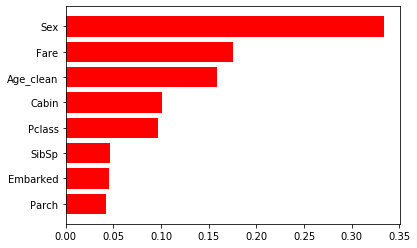

In [5]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model
Pickle is the standard way of serializing objects in Python.
You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
Later you can load this file to deserialize your model and use it to make new predictions.

You can find more information on this from this link: https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models

In [6]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_raw_original_features.pkl')

['mdl_raw_original_features.pkl']

## 2. Build Models To Compare Features: Cleaned Original Features <a name="cleaned-original-features"></a>

**Cleaned Original features:** So this is just a set of original features with the minimum cleaning applied, like filling in missing values, and outlier removal.

Fitting a model on cleaned feature will give us some insight into how much value imputing missing values and removing outliers provide a model. Did it allow the model to better pick up on the underlying trends in the data? Let's find out. 

In [7]:

train_features = pd.read_csv('data/train_features_original.csv')
train_labels = pd.read_csv('data/train_labels.csv', header=None)

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,0.450064,0.545364
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.450064,-0.334468
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,0.450064,0.545364
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,0.450064,0.545364
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,0.450064,0.545364


### GridSearchCV

In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [9]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 64}

0.794 (+/-0.112) for {'max_depth': 2, 'n_estimators': 8}
0.798 (+/-0.111) for {'max_depth': 2, 'n_estimators': 16}
0.779 (+/-0.107) for {'max_depth': 2, 'n_estimators': 32}
0.787 (+/-0.102) for {'max_depth': 2, 'n_estimators': 64}
0.8 (+/-0.105) for {'max_depth': 2, 'n_estimators': 128}
0.796 (+/-0.108) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.103) for {'max_depth': 2, 'n_estimators': 512}
0.822 (+/-0.117) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.082) for {'max_depth': 4, 'n_estimators': 16}
0.833 (+/-0.094) for {'max_depth': 4, 'n_estimators': 32}
0.818 (+/-0.113) for {'max_depth': 4, 'n_estimators': 64}
0.828 (+/-0.118) for {'max_depth': 4, 'n_estimators': 128}
0.82 (+/-0.116) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.108) for {'max_depth': 4, 'n_estimators': 512}
0.818 (+/-0.053) for {'max_depth': 8, 'n_estimators': 8}
0.837 (+/-0.054) for {'max_depth': 8, 'n_estimators': 16}
0.822 (+/-0.072) for {

C:\Users\archi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Observation:** 0.843 (+/-0.058) for {'max_depth': 8, 'n_estimators': 64} Performs the best

### Feature Importance

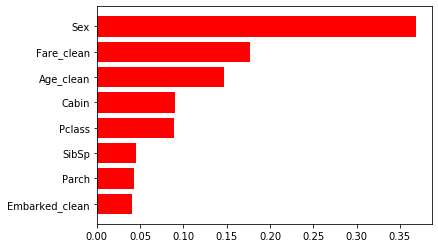

In [10]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [11]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_cleaned_original_features.pkl')

['mdl_cleaned_original_features.pkl']

## 3. Build Models To Compare Features: All Features <a name="all-features"></a>

**All features:** Now, let's fit a model on all of the features. And to be clear, when we say all features, we mean the cleaned versions of the features, plus the new features we created, and this will give us some insight into how much failure the new features are providing us above what the simple clean features provided.

In [12]:
train_features = pd.read_csv('data/train_features_all.csv')
train_labels = pd.read_csv('data/train_labels.csv', header=None)

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,-0.446199,0.450064,-0.544166,0.545364,0.430223,-0.540385
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.373863,0.450064,-0.544166,-0.334468,-1.784129,2.277639
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,1.003414,0.450064,-0.544166,0.545364,0.430223,-0.540385
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,-0.494025,0.450064,-0.544166,0.545364,-1.230541,0.023220
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,-0.288093,0.450064,-0.544166,0.545364,-1.230541,-0.540385


### GridSearchCV

In [13]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [14]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 32}

0.787 (+/-0.104) for {'max_depth': 2, 'n_estimators': 8}
0.785 (+/-0.134) for {'max_depth': 2, 'n_estimators': 16}
0.796 (+/-0.127) for {'max_depth': 2, 'n_estimators': 32}
0.779 (+/-0.12) for {'max_depth': 2, 'n_estimators': 64}
0.8 (+/-0.12) for {'max_depth': 2, 'n_estimators': 128}
0.79 (+/-0.123) for {'max_depth': 2, 'n_estimators': 256}
0.779 (+/-0.131) for {'max_depth': 2, 'n_estimators': 512}
0.818 (+/-0.097) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.071) for {'max_depth': 4, 'n_estimators': 16}
0.82 (+/-0.104) for {'max_depth': 4, 'n_estimators': 32}
0.828 (+/-0.078) for {'max_depth': 4, 'n_estimators': 64}
0.813 (+/-0.124) for {'max_depth': 4, 'n_estimators': 128}
0.822 (+/-0.103) for {'max_depth': 4, 'n_estimators': 256}
0.818 (+/-0.107) for {'max_depth': 4, 'n_estimators': 512}
0.835 (+/-0.095) for {'max_depth': 8, 'n_estimators': 8}
0.822 (+/-0.09) for {'max_depth': 8, 'n_estimators': 16}
0.837 (+/-0.067) for {'max

C:\Users\archi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Observation:** 0.837 (+/-0.067) for {'max_depth': 8, 'n_estimators': 32} Performs the best

### Feature Importance

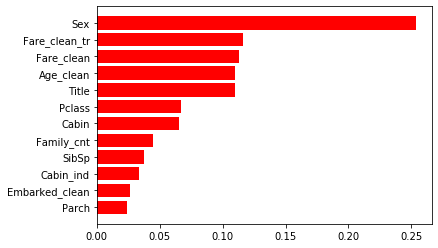

In [15]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [16]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_all_features.pkl')

['mdl_all_features.pkl']

## 4. Build Models To Compare Features: Reduced Set Of Features <a name="reduced-features"></a>

**Reduced features:** Let's fit a model on a reduced set of what seemed to be the best features. How much signal can this small subset of features capture?

### Read In Data

In [17]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('data/train_features_reduced.csv')
train_labels = pd.read_csv('data/train_labels.csv', header=None)

train_features.head()

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,-0.408652,0.737125,2.570771,-0.540385,-0.446199,-0.544166,0.430223
1,0.803682,0.737125,-1.673694,2.277639,0.373863,-0.544166,-1.784129
2,0.803682,0.737125,0.212735,-0.540385,1.003414,-0.544166,0.430223
3,0.803682,-1.356623,-0.730480,0.023220,-0.494025,-0.544166,-1.230541
4,-0.408652,-1.356623,-0.101670,-0.540385,-0.288093,-0.544166,-1.230541


### GridSearchCV

In [18]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [19]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 16}

0.777 (+/-0.097) for {'max_depth': 2, 'n_estimators': 8}
0.807 (+/-0.113) for {'max_depth': 2, 'n_estimators': 16}
0.796 (+/-0.132) for {'max_depth': 2, 'n_estimators': 32}
0.794 (+/-0.121) for {'max_depth': 2, 'n_estimators': 64}
0.787 (+/-0.116) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.125) for {'max_depth': 2, 'n_estimators': 256}
0.779 (+/-0.12) for {'max_depth': 2, 'n_estimators': 512}
0.809 (+/-0.127) for {'max_depth': 4, 'n_estimators': 8}
0.83 (+/-0.112) for {'max_depth': 4, 'n_estimators': 16}
0.824 (+/-0.103) for {'max_depth': 4, 'n_estimators': 32}
0.809 (+/-0.116) for {'max_depth': 4, 'n_estimators': 64}
0.818 (+/-0.102) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.102) for {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-0.102) for {'max_depth': 4, 'n_estimators': 512}
0.818 (+/-0.036) for {'max_depth': 8, 'n_estimators': 8}
0.83 (+/-0.086) for {'max_depth': 8, 'n_estimators': 16}
0.818 (+/-0.056) for 

C:\Users\archi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Observation:** 0.83 (+/-0.112) for {'max_depth': 4, 'n_estimators': 16} Performs the best

### Feature Importance

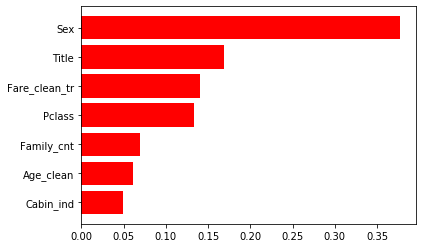

In [20]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [21]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_reduced_features.pkl')

['mdl_reduced_features.pkl']

## 5. Build Models To Compare Features: Compare And Evaluate All Models  <a name="compare-all-models"></a>

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

### Read In Data

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features_raw = pd.read_csv('data/val_features_raw.csv')
val_features_original = pd.read_csv('data/val_features_original.csv')
val_features_all = pd.read_csv('data/val_features_all.csv')
val_features_reduced = pd.read_csv('data/val_features_reduced.csv')

val_labels = pd.read_csv('data/val_labels.csv', header=None)

val_features_raw.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-1.620987,-1.356623,0.031883,0.325139,-0.468427,1.047786,-1.239700,-2.010857
1,-1.620987,0.737125,1.273851,-0.464063,-0.468427,-0.078274,-2.070731,0.573494
2,0.803682,0.737125,0.031883,-0.464063,-0.468427,-0.463821,0.450064,-0.718682
3,-0.408652,-1.356623,-0.416075,0.325139,-0.468427,-0.124726,0.450064,0.573494
4,-0.408652,0.737125,0.527140,-0.464063,-0.468427,-0.368596,-1.128895,-2.010857


### Read In Models

In [23]:
# Read in models
models = {}

for mdl in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load('mdl_{}_features.pkl'.format(mdl))

### Evaluate Models On The Validation Set

We have a function called evaluate model that's going to help us evaluate these models on the validation and the test set. And this function accepts the following arguments. The name of the model, the model object itself, the features for either the validation or the test set, and the labels for either the validation or the test set. So now we're going to be using this time method that just stores the time when the given command was run. So between start and end, we're going to ask the model to make a prediction on all of the examples in the validation or the test set. So again, this will store the time immediately before and immediately after those predictions are made. So then we'll be able to calculate how long it took to make those predictions.

In [24]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [25]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw_original'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_original, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 24.9ms
Cleaned Features -- 	Accuracy: 0.792 / Precision: 0.769 / Recall: 0.615 / Latency: 6.0ms
All Features -- 	Accuracy: 0.809 / Precision: 0.782 / Recall: 0.662 / Latency: 4.0ms
Reduced Features -- 	Accuracy: 0.809 / Precision: 0.816 / Recall: 0.615 / Latency: 2.0ms


### How do we balance precision and recall, and then how do we weigh latency against performance?

**Precision and Recall trade off** - Which model you would choose or which metric you would favor really comes down to the problem you're trying to solve or the business use case. For instance, for spam detector, we would want to optimize for precision. In other words, if the model says it's spam, it better be spam or else it would be blocking real emails that people want to see. On the other side, if this is a fraud detection model, you're likely to optimize for recall because missing one of those fraudulent transactions could cost thousands or tens of thousands of dollars. 

**Overall Accuracy and Latency** - It's a little bit easier in my case because the best performing model has the best latency. So right way, we can pretty much eliminate the model built on raw features. Now accuracy and precision of cleaned features is less than all features and reduced features. So we cn safely eliminated the cleaned features model too.  

Now we have all features and reduced features and accuracy is same for both, precision is higher for reduced and recall is higher for all features. And so the performance is comparable. Now in this case we will choose the model with lower latency. But again, this comes down to the business use case. It could be that Latency of all features was less than reduced features and then we would have chosen that may be.

Sometimes a couple of milliseconds makes a huge difference. For instance, in a case like fraud detection, a couple milliseconds makes a huge difference. So it really depends on the use case. If we're deploying this in a real time environment where prediction speed was critical, we would probably make that small trade off of model performance, and we would deploy the model built on reduced features because it's quite a bit faster. 

So let's just go with the model built on reduced features.  


### Evaluate Best Model On Test Set

Now, just as a reminder, we should see performance that aligns fairly closely with the validation set. The reason we evaluate on the validation set and the test set is because we used performance on the validation set to select our best model. So in a sense, the validation set played a role in our model selection process. So this test set was not used for any model selection. So it's a completely unbiased view of how we can expect this model to perform moving forward. Ideally, we're just looking for performance that is relatively close to what we saw in the validation set. 

In [30]:
# Read in our test features
test_features = pd.read_csv('data/test_features_reduced.csv')
test_labels = pd.read_csv('data/test_labels.csv', header=None)

In [31]:
# Evaluate our final model on the test set
evaluate_model('Reduced Features', models['reduced'], test_features, test_labels)

Reduced Features -- 	Accuracy: 0.788 / Precision: 0.817 / Recall: 0.645 / Latency: 3.0ms


**Observation:** we can see that the model performance is relatively close. Now compared to validation results, Accuracy dropped a little bit, latency went up a little bit, but precision and recall improved slightly. 

So now we have a great feel for the likely performance of this model on new data. And we can be confident in proposing this model as the best model for making predictions on whether people aboard the Titanic would survive or not. This skill set you've learned today can now be generalized to any feature set to allow you to extract every last ounce of value out of the features in order to build a powerful machine learning model. 